# Fed Interest Rates Simulation using Cox-Ingersoll-Ross Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter as ff
from scipy.stats import gaussian_kde
%matplotlib inline

In [3]:
# CIR model parameters
a = 22.6            # Mean reversion speed
b = 0.0617          # Long-term mean
sigma = 0.02        # Volatility

In [4]:
# Other inputs for the Vasicek models
r0 = 0.055       # Current Fed Interest Rate - as per last FOMC meeting
T = 10           # Time horizon for the forecast (10 years by default)
n = 12           # Time steps per year
N = T*n          # Total time steps
dt = T/N         # Length of each time interval
M = 100          # Total number of simulations

In [5]:
# Generating random variable for the Weiner process
dw = np.random.randn(M,N)

# Initializing a matrix to store the calculates interest rates
rates = r0*np.ones((M,N+1))

## The CIR Model
$$r_{i+dt} = r_i + a(b-r_i)dt + \sigma.\sqrt{r_i.dt}.W.\sqrt{dt}$$

In [7]:
# Creating the Vasicek model
for i in range(0,N):
    rates[:,i+1] = rates[:,i] + a*(b-rates[:,i])*dt + sigma*np.sqrt(rates[:,i])*dw[:,i]*np.sqrt(dt)

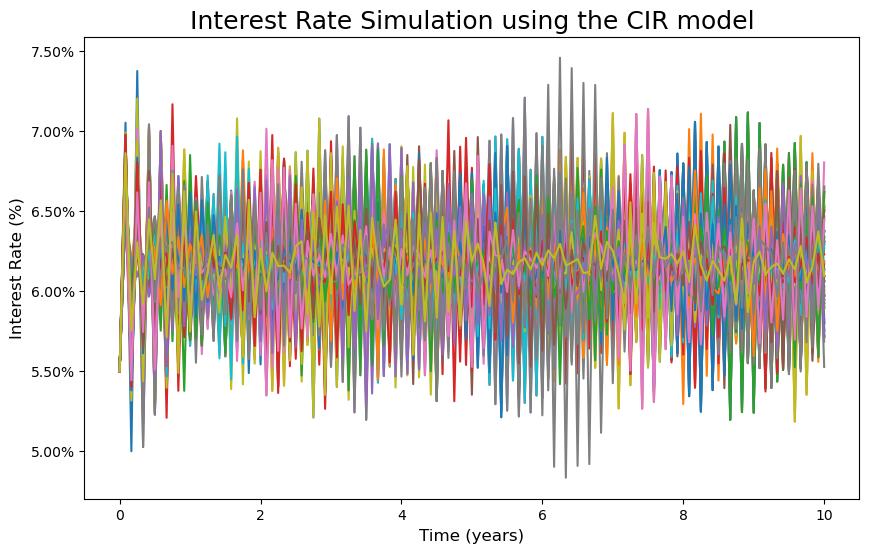

In [8]:
plt.figure(figsize=(10,6))

a = [np.random.randint(0,M) for j in range(1,M)]

for m in a:
    plt.plot(np.linspace(0,T,N+1),rates[m])
    plt.xlabel('Time (years)', fontsize=12)
    plt.ylabel('Interest Rate (%)', fontsize=12)
    plt.title('Interest Rate Simulation using the CIR model', fontsize=18)

        
# Function to format y-axis values to percentages
def to_percent(y, _):
    return f'{y * 100:.2f}%'

# Applying the percentage formatting to y-axis ticks
plt.gca().yaxis.set_major_formatter(ff(to_percent))

plt.show()

In [9]:
# Getting the average interest rate forecasts
mean_rates = np.zeros(N+1)

for i in range(0,N):
    mean_rates[i] = np.mean(rates[:, i])
    
mean_rates_cleaned = np.delete(mean_rates, N)
mean_rates_cleaned

array([0.055     , 0.06748718, 0.05632989, 0.06650936, 0.05718055,
       0.06547819, 0.05830856, 0.0645352 , 0.05912178, 0.06396294,
       0.05991669, 0.06324076, 0.0602834 , 0.06306378, 0.06038667,
       0.06269854, 0.06093202, 0.0624948 , 0.06103847, 0.06204182,
       0.06149613, 0.062065  , 0.06149122, 0.0618137 , 0.06146713,
       0.0620477 , 0.06146545, 0.06172769, 0.0615525 , 0.06192389,
       0.06174481, 0.06143801, 0.06203093, 0.06150422, 0.0616051 ,
       0.06168003, 0.0613965 , 0.06186023, 0.06193693, 0.0616015 ,
       0.06174156, 0.06160003, 0.06148232, 0.06172971, 0.06171709,
       0.06201253, 0.06137888, 0.06213236, 0.06137954, 0.06215597,
       0.06113167, 0.06190492, 0.06169519, 0.06180361, 0.06157296,
       0.06168869, 0.06153856, 0.06176721, 0.06162187, 0.06179849,
       0.06152147, 0.06186196, 0.06134072, 0.06209346, 0.06125867,
       0.06200607, 0.06117252, 0.06227837, 0.06109712, 0.06210294,
       0.06112891, 0.06202256, 0.06139004, 0.06193686, 0.06142

Text(0.5, 1.0, 'IR Simulation using the CIR model')

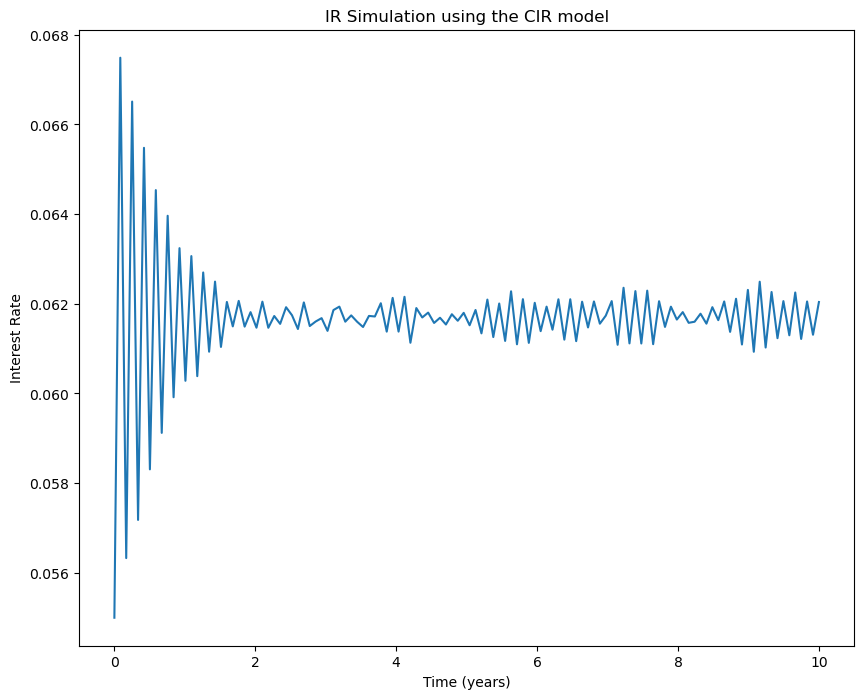

In [10]:
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,T,N),mean_rates_cleaned)
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate')
plt.title('IR Simulation using the CIR model')

In [11]:
rates[:,:12]
yr_1_rates = []

for i in range(100):
    for k in range(12):
        yr_1_rates.append(rates[i,k])

yr_1_rates
# pd.DataFrame(rates[:,:12]).to_csv('test.csv')

[0.055,
 0.06688225705764962,
 0.056800112540440977,
 0.06526535543106703,
 0.05768380722939385,
 0.0670667026447828,
 0.05471360094776424,
 0.06992057996160242,
 0.055351277381325566,
 0.06723143570771441,
 0.05859330560834055,
 0.0665593488444705,
 0.055,
 0.06669478648953904,
 0.05680952585896228,
 0.06923893580513742,
 0.05324057005283049,
 0.06968735032126613,
 0.05407930196804768,
 0.06730591795205633,
 0.05674689972919227,
 0.06466627874517632,
 0.057313704303360066,
 0.06649508824020378,
 0.055,
 0.06550607664950367,
 0.05926462856436103,
 0.06376660597697935,
 0.05944105724655801,
 0.06510395360791713,
 0.060764584647558524,
 0.06300915418165803,
 0.06224772355684831,
 0.06014751342528068,
 0.06335243654320044,
 0.058598629796489506,
 0.055,
 0.06849454574429902,
 0.054100877866107275,
 0.06883897781739065,
 0.05555657728569178,
 0.0679001990771859,
 0.05615054156411369,
 0.06632227598494439,
 0.05575017073170355,
 0.06611196817344141,
 0.058606504055062146,
 0.063410856186302

In [12]:
average_rate = np.mean(mean_rates_cleaned)
average_rate
sd_rate = np.std(mean_rates_cleaned)
sd_rate

0.0013645325987008824

In [13]:
average_rate

0.06166098616237202

In [14]:
rates

array([[0.055     , 0.06688226, 0.05680011, ..., 0.05885767, 0.0659898 ,
        0.05711933],
       [0.055     , 0.06669479, 0.05680953, ..., 0.0563452 , 0.06693932,
        0.05499875],
       [0.055     , 0.06550608, 0.05926463, ..., 0.05612464, 0.06714312,
        0.0552665 ],
       ...,
       [0.055     , 0.06624974, 0.0588847 , ..., 0.06522452, 0.05767506,
        0.06462742],
       [0.055     , 0.06688005, 0.05637573, ..., 0.06193325, 0.05843282,
        0.06529592],
       [0.055     , 0.06876427, 0.05727987, ..., 0.06292605, 0.05856835,
        0.06181264]])

In [15]:
pd.DataFrame(rates).to_csv('cir.csv')

In [16]:
print(np.isnan(rates).sum())

0


In [17]:
yr_1_rates

[0.055,
 0.06688225705764962,
 0.056800112540440977,
 0.06526535543106703,
 0.05768380722939385,
 0.0670667026447828,
 0.05471360094776424,
 0.06992057996160242,
 0.055351277381325566,
 0.06723143570771441,
 0.05859330560834055,
 0.0665593488444705,
 0.055,
 0.06669478648953904,
 0.05680952585896228,
 0.06923893580513742,
 0.05324057005283049,
 0.06968735032126613,
 0.05407930196804768,
 0.06730591795205633,
 0.05674689972919227,
 0.06466627874517632,
 0.057313704303360066,
 0.06649508824020378,
 0.055,
 0.06550607664950367,
 0.05926462856436103,
 0.06376660597697935,
 0.05944105724655801,
 0.06510395360791713,
 0.060764584647558524,
 0.06300915418165803,
 0.06224772355684831,
 0.06014751342528068,
 0.06335243654320044,
 0.058598629796489506,
 0.055,
 0.06849454574429902,
 0.054100877866107275,
 0.06883897781739065,
 0.05555657728569178,
 0.0679001990771859,
 0.05615054156411369,
 0.06632227598494439,
 0.05575017073170355,
 0.06611196817344141,
 0.058606504055062146,
 0.063410856186302

In [18]:
rate_df=pd.DataFrame(rates[:,11])

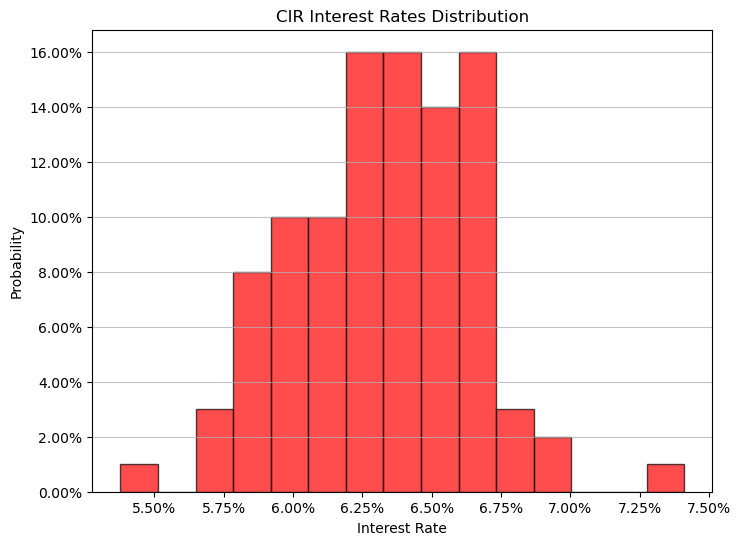

In [19]:
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm

# Assuming Benchmark_difference is a pandas Series or a NumPy array
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the histogram on the primary y-axis
counts, bins, _ = ax1.hist(rates[:, 11], bins=15, alpha=0.7, color='red', edgecolor='black', label='Histogram')
ax1.set_xlabel('Interest Rate')
ax1.set_ylabel('Probability')
plt.title('CIR Interest Rates Distribution')
ax1.grid(axis='y', alpha=0.75)

# Customize y-axis labels to display percentages for the histogram
def to_percentage(y, _):
    return f"{y:.2f}%"

ax1.yaxis.set_major_formatter(FuncFormatter(to_percentage))

def to_percentage_x(x, _):
    return f"{x*100:.2f}%"

ax1.xaxis.set_major_formatter(FuncFormatter(to_percentage_x))

plt.show()

In [20]:
mean_rate = np.mean(rates[:, 11])
std_dev = np.std(rates[:, 11])

In [21]:
print(mean_rate)
print(std_dev)

0.06324076362027138
0.003215682914138269
